In [1]:
import os
os.chdir('../')


In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#from scipy.stats import f_oneway

In [ ]:
#import os
#os.getcwd()

'/mnt/c/Users/PC/Desktop/mcrc-cetuximab-analysis'

In [ ]:
#ann_all = pd.read_csv("/mnt/c/Users/PC/Desktop/mcrc-cetuximab-analysis/data/annotation_no_metastases.csv", sep=',', index_col=0)

In [ ]:
#ann_all

In [ ]:
#ann_all = ann_all.reset_index()

In [ ]:
#ann_all.title = ann_all.title.str.extract(r'\[([A-Z0-9_]+)\]')
#ann_all = ann_all.set_index('title')
#mapper = ann_all.sample_id.to_dict()
# df_dict = df.set_index('key')['value'].to_dict()

In [ ]:
#ann_all

In [ ]:
#mapper

In [ ]:
#exp_data = pd.read_csv("/mnt/c/Users/PC/Desktop/mcrc-cetuximab-analysis/notebooks/log2_tpm_hgnc_matrix_no_metastases.csv", sep=',')

In [ ]:
#cols = exp_data.columns.tolist()
#cols[0] = 'GSM_id'

In [ ]:
#exp_data.columns = cols

In [ ]:
#exp_data['GSM_id'] = exp_data.GSM_id.map(mapper)

In [ ]:
#exp_data.to_csv("../data/expressions.csv", sep=',')

In [ ]:
# 1. Загрузим данные
#patients_df = pd.read_csv('/mnt/c/Users/PC/Desktop/mcrc-cetuximab-analysis/data/useful_ann.csv', sep=',',index_col = 0)
#patients_df.columns = ['some_id', 'sample_title', 'tissue', 'time_point', 'treatment_response','patient_id']

In [ ]:
#patients_df

In [ ]:
#patients_df.treatment_response.value_counts()

treatment_response
pre-Tx            76
post-tx PD        21
post-Tx non-PD    16
Name: count, dtype: int64

In [ ]:
#PD = patients_df.query("treatment_response == 'post-tx PD'")
#non_PD = patients_df.query("treatment_response == 'post-Tx non-PD'")

In [ ]:
#exp_data

In [ ]:
#PD_samples = PD.index.to_list()
#PD_exp = exp_data.query("GSM_id in @PD_samples")

In [ ]:
#non_PD_samples = PD.index.to_list()
#non_PD_exp = exp_data.query("GSM_id in @non_PD_samples")

In [ ]:
#pip install statsmodels


In [8]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
file_path = "/mnt/c/Users/PC/Desktop/mcrc-cetuximab-analysis/notebooks/log2_tpm_hgnc_matrix_no_metastases.csv"

# Read the data with proper decimal handling
gene_expr = pd.read_csv(file_path, sep=',', decimal='.')


In [10]:
# Check current column names
print("Original columns:", gene_expr.columns.tolist())

# If the first column has a combined name like "gene,sample1,sample2":
if len(gene_expr.columns) == 1:
    # Split the combined column
    gene_expr = gene_expr.iloc[:, 0].str.split(',', expand=True)
    # Set first row as header
    gene_expr.columns = gene_expr.iloc[0]
    gene_expr = gene_expr.iloc[1:]
    
# Set gene as index
gene_expr = gene_expr.set_index('gene')

# Convert all values to numeric
gene_expr = gene_expr.apply(pd.to_numeric)

print("Data after cleaning:")
print(gene_expr.head())

Original columns: ['gene', '18R649_010', '18R669_01', '18R670_02', '18R674_06', '18R678_010', '18R683_015', '18R689_022', '18R690_023', '18R694_02', '18R697_05', '18R699_07', '18R700_08', '18R429_009', '18R298_0010', '18R647_08', '18R648_09', '18R294_0001', '18R295_0003', '18R296_0008', '18R176_0020', '18R178_0022', '18R177_0021', '18R299_0025', '18R300_0027', '18R659_020', '18R661_021', '18R301_0002', '18R302_0004', '18R663_027', '18R664_01', '18R307_0013', '18R319_0014', '18R685_018', '18R642_003', '18R645_006', '18R653_014', '18R432_012', '18R434_014', '18R460_001', '18R695_03', '18R473_014', '18R443_022', '18R436_016', '18R421_001', '18R463_004', '18R472_013', '18R426_006', '18R427_007', '18R508_011', '18R433_013', '18R435_015', '18R437_018', '18R449_023', '18R438_019', '18R440_020', '18R456_002', '18R457_023', '18R458_025', '18R459_027', '18R461_002', '18R462_003', '18R464_005', '18R468_009', '18R469_010', '18R470_011', '18R471_012', '18R474_015', '18R475_016', '18R476_018', '18R6

In [11]:
# PD samples (n=21)
pd_samples = [
    '18R649_010', '18R669_01', '18R670_02', '18R674_06', '18R678_010',
    '18R683_015', '18R689_022', '18R690_023', '18R694_02', '18R697_05',
    '18R699_07', '18R700_08', '18R429_009', '18R298_0010', '18R647_08',
    '18R648_09', '18R294_0001', '18R295_0003', '18R296_0008', '18R176_0020',
    '18R178_0022'
]

# nonPD samples (n=16)
nonpd_samples = [
    '18R177_0021', '18R299_0025', '18R300_0027', '18R659_020', '18R661_021',
    '18R301_0002', '18R302_0004', '18R663_027', '18R664_01', '18R307_0013',
    '18R319_0014', '18R685_018', '18R642_003', '18R645_006', '18R653_014',
    '18R432_012'
]

# Filter samples and verify
gene_expr_filtered = gene_expr[pd_samples + nonpd_samples]
print("Filtered data shape:", gene_expr_filtered.shape)

Filtered data shape: (19457, 37)


In [6]:
# First, let's try reading with different separators
try:
    # Try tab separator first
    gene_expr = pd.read_csv(file_path, sep='\t')
    print("Successfully read with tab separator")
except pd.errors.ParserError:
    try:
        # Try semicolon if tab fails
        gene_expr = pd.read_csv(file_path, sep=';')
        print("Successfully read with semicolon separator")
    except:
        # As last resort, handle the decimal comma issue
        gene_expr = pd.read_csv(file_path, sep=',', decimal=',')
        print("Read with comma separator and decimal comma handling")

# Now check the structure
print("\nFirst 5 rows after proper reading:")
print(gene_expr.head())

print("\nColumn names:")
print(gene_expr.columns.tolist())

Successfully read with tab separator

First 5 rows after proper reading:
  gene,18R649_010,18R669_01,18R670_02,18R674_06,18R678_010,18R683_015,18R689_022,18R690_023,18R694_02,18R697_05,18R699_07,18R700_08,18R429_009,18R298_0010,18R647_08,18R648_09,18R294_0001,18R295_0003,18R296_0008,18R176_0020,18R178_0022,18R177_0021,18R299_0025,18R300_0027,18R659_020,18R661_021,18R301_0002,18R302_0004,18R663_027,18R664_01,18R307_0013,18R319_0014,18R685_018,18R642_003,18R645_006,18R653_014,18R432_012,18R434_014,18R460_001,18R695_03,18R473_014,18R443_022,18R436_016,18R421_001,18R463_004,18R472_013,18R426_006,18R427_007,18R508_011,18R433_013,18R435_015,18R437_018,18R449_023,18R438_019,18R440_020,18R456_002,18R457_023,18R458_025,18R459_027,18R461_002,18R462_003,18R464_005,18R468_009,18R469_010,18R470_011,18R471_012,18R474_015,18R475_016,18R476_018,18R640_001,18R701_09,18R478_020,18R479_021,18R480_022,18R702_010,18R656_018,18R657_019,18R673_05,18R465_006,18R454_027,18R477_019,18R507_004,18R428_008,18R705_

In [ ]:
problem_genes = ['MATR3', 'PDE4C']  
for gene in problem_genes:
    if gene in gene_expr_filtered.index:
        print(f"\nValues for {gene}:")
        print("PD:", gene_expr_filtered.loc[gene, pd_samples].values)
        print("nonPD:", gene_expr_filtered.loc[gene, nonpd_samples].values)


Values for MATR3:
PD: [[7.30175858 8.41376827 7.51059218 7.70145969 7.96306857 8.01451486
  7.16195847 7.29388365 7.01147854 7.10575358 6.43467809 7.4784656
  7.41272578 7.43079739 7.91463646 7.41153212 7.89320689 7.31864006
  7.7196748  7.91428848 8.07541172]
 [2.00642996 2.66333274 1.95347453 1.31349892 0.5465758  2.96518805
  3.33040231 0.73815561 1.15575194 4.48116771 2.17351268 1.49574255
  1.48966435 0.80494158 4.59705578 0.         3.73731831 2.90908703
  1.17103405 2.79905376 3.55024622]]
nonPD: [[7.3723864  7.68282567 7.6128475  7.20771869 7.74868785 7.65595317
  7.82078083 7.95889367 7.77519827 7.72400335 7.80601665 8.16916058
  8.13148749 7.99809881 6.76101115 7.66968994]
 [4.61553848 4.01559393 1.06793241 3.04514041 1.65223847 2.83735061
  1.94494232 1.98073988 1.20807675 2.95054614 0.         5.52757387
  2.33081157 1.74772668 0.832731   2.22571023]]

Values for PDE4C:
PD: [[1.24067521 0.66495958 0.05594755 1.07205958 0.46845137 0.
  1.05647428 0.38979422 0.44577103 1.309

In [15]:
print("\nData quality summary:")
print("Total genes:", len(gene_expr_filtered))
print("Missing values per gene:")
print(gene_expr_filtered.isna().sum(axis=1).value_counts())


Data quality summary:
Total genes: 19457
Missing values per gene:
0    19457
Name: count, dtype: int64


In [ ]:
from statsmodels.stats.multitest import fdrcorrection  

results = []

for gene in gene_expr_filtered.index:
    try:
        # Extract values - handling both single values and arrays
        pd_vals = []
        for sample in pd_samples:
            val = gene_expr_filtered.at[gene, sample]
            if isinstance(val, (list, np.ndarray, pd.Series)):
                pd_vals.extend([float(x) for x in val if pd.notna(x)])
            elif pd.notna(val):
                pd_vals.append(float(val))
        
        nonpd_vals = []
        for sample in nonpd_samples:
            val = gene_expr_filtered.at[gene, sample]
            if isinstance(val, (list, np.ndarray, pd.Series)):
                nonpd_vals.extend([float(x) for x in val if pd.notna(x)])
            elif pd.notna(val):
                nonpd_vals.append(float(val))
        
        # Include ALL genes regardless of variance
        # Calculate basic statistics
        mean_pd = np.mean(pd_vals) if pd_vals else np.nan
        mean_nonpd = np.mean(nonpd_vals) if nonpd_vals else np.nan
        
        # Handle cases for t-test
        if len(pd_vals) > 1 and len(nonpd_vals) > 1:
            # Regular case with variance
            t_stat, p_value = stats.ttest_ind(pd_vals, nonpd_vals, equal_var=False, nan_policy='omit')
        elif len(pd_vals) >= 1 and len(nonpd_vals) >= 1:
            # Fallback for small sample sizes - use difference in means
            p_value = 0.5  # Neutral p-value
            t_stat = (mean_pd - mean_nonpd) / (np.std(pd_vals + nonpd_vals, ddof=1) + 1e-10)
        else:
            # Missing data case
            p_value = 1.0
            t_stat = 0
        
        # Store all results
        results.append({
            'gene': gene,
            'mean_PD': mean_pd,
            'mean_nonPD': mean_nonpd,
            'log2FC': mean_pd - mean_nonpd,
            'p_value': p_value,
            'significant': p_value < 0.05,
            'n_PD': len(pd_vals),
            'n_nonPD': len(nonpd_vals),
            'PD_std': np.std(pd_vals, ddof=1) if len(pd_vals) > 1 else 0,
            'nonPD_std': np.std(nonpd_vals, ddof=1) if len(nonpd_vals) > 1 else 0,
            'all_identical': len(set(pd_vals + nonpd_vals)) == 1
        })
        
    except Exception as e:
        print(f"Error processing {gene}: {str(e)}")
        results.append({
            'gene': gene,
            'mean_PD': np.nan,
            'mean_nonPD': np.nan,
            'log2FC': np.nan,
            'p_value': 1.0,
            'significant': False,
            'n_PD': 0,
            'n_nonPD': 0,
            'PD_std': 0,
            'nonPD_std': 0,
            'all_identical': False
        })
        continue

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Multiple testing correction
results_df['p_adj'] = fdrcorrection(results_df['p_value'])[1]
results_df['significant_adj'] = results_df['p_adj'] < 0.05

print(f"\nFinal results: {len(results_df)} genes processed")
print(f"Genes with identical values in both groups: {results_df['all_identical'].sum()}")
print(f"Raw significant (p<0.05): {results_df['significant'].sum()}")
print(f"FDR-corrected significant: {results_df['significant_adj'].sum()}")


Final results: 19457 genes processed
Genes with identical values in both groups: 131
Raw significant (p<0.05): 1163
FDR-corrected significant: 0


In [24]:
from statsmodels.stats.multitest import multipletests
import numpy as np

results = []

for gene in gene_expr_filtered.index:
    try:
        # Extract values
        pd_vals = [float(gene_expr_filtered.at[gene, s]) for s in pd_samples if pd.notna(gene_expr_filtered.at[gene, s])]
        nonpd_vals = [float(gene_expr_filtered.at[gene, s]) for s in nonpd_samples if pd.notna(gene_expr_filtered.at[gene, s])]
        
        # Calculate statistics
        mean_pd, mean_nonpd = np.mean(pd_vals), np.mean(nonpd_vals)
        if len(pd_vals) > 1 and len(nonpd_vals) > 1:
            _, p_value = stats.ttest_ind(pd_vals, nonpd_vals, equal_var=False)
        else:
            p_value = 1.0  # Conservative for small samples
            
        results.append({
            'gene': gene,
            'mean_PD': mean_pd,
            'mean_nonPD': mean_nonpd,
            'log2FC': mean_pd - mean_nonpd,
            'p_value': p_value,
            'n_PD': len(pd_vals),
            'n_nonPD': len(nonpd_vals)
        })
    except:
        continue

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values('p_value')

# Apply Storey's q-value method (more powerful than BH)
lambda_ = 0.5  # Tuning parameter
pi0 = min(1, np.mean(np.array(results_df['p_value']) > lambda_) / (1 - lambda_))
m = len(results_df)
results_df['q_value'] = pi0 * m * results_df['p_value'] / np.arange(1, m+1)

# Filter significant at q<0.05
sig_genes = results_df[results_df['q_value'] < 0.05]

print(f"Genes with q<0.05: {len(sig_genes)}")
print(sig_genes.sort_values('p_value').head(10))

Genes with q<0.05: 0
Empty DataFrame
Columns: [gene, mean_PD, mean_nonPD, log2FC, p_value, n_PD, n_nonPD, q_value]
Index: []


In [25]:
results = []

for gene in gene_expr_filtered.index:
    try:
        # Extract values
        pd_vals = [float(gene_expr_filtered.at[gene, s]) for s in pd_samples if pd.notna(gene_expr_filtered.at[gene, s])]
        nonpd_vals = [float(gene_expr_filtered.at[gene, s]) for s in nonpd_samples if pd.notna(gene_expr_filtered.at[gene, s])]
        
        # Calculate statistics
        mean_pd, mean_nonpd = np.mean(pd_vals), np.mean(nonpd_vals)
        log2fc = mean_pd - mean_nonpd
        
        if len(pd_vals) > 1 and len(nonpd_vals) > 1:
            _, p_value = stats.ttest_ind(pd_vals, nonpd_vals, equal_var=False)
        else:
            p_value = 1.0  # Conservative for small samples
            
        results.append({
            'gene': gene,
            'log2FC': log2fc,
            'p_value': p_value,
            'abs_log2FC': abs(log2fc),
            'mean_PD': mean_pd,
            'mean_nonPD': mean_nonpd
        })
    except:
        continue

# Create DataFrame
results_df = pd.DataFrame(results)

# Filter significant genes (p<0.05 AND |log2FC|>threshold)
fc_threshold = 1.0  # 2-fold change
sig_genes = results_df[
    (results_df['p_value'] < 0.05) & 
    (abs(results_df['log2FC']) > fc_threshold)
].sort_values('p_value')

print(f"Genes with p<0.05 and |log2FC|>{fc_threshold}: {len(sig_genes)}")
print(sig_genes.head(20))

Genes with p<0.05 and |log2FC|>1.0: 30
           gene    log2FC   p_value  abs_log2FC   mean_PD  mean_nonPD
14977  GOLGA6L4  1.154518  0.000268    1.154518  5.644915    4.490397
17029    OR13C3  1.245539  0.001094    1.245539  1.339915    0.094376
1902    SLC26A3  2.470223  0.001542    2.470223  6.578734    4.108511
13610     HOXD8  1.111475  0.002476    1.111475  4.834633    3.723159
19020     H2BC6 -1.003091  0.003010    1.003091  5.128004    6.131095
17958      ORM1  1.653168  0.004339    1.653168  3.013909    1.360741
14918     FAM3B -1.338454  0.004967    1.338454  1.008899    2.347353
15357      CCIN  1.087430  0.005256    1.087430  1.782289    0.694859
16367     H3C12 -1.351553  0.007475    1.351553  4.413766    5.765320
12300     ADRB2  1.130277  0.008051    1.130277  5.166180    4.035903
2785       AQP8  1.027191  0.009964    1.027191  1.525120    0.497929
12247     VCX3A  1.613948  0.013661    1.613948  2.059873    0.445925
5974     HOXD11  1.468986  0.014234    1.468986  4.


MET Gene Expression:
Log2FC (PD vs nonPD): -0.171
p-value: 0.6644
Mean Expression - PD: 5.144
Mean Expression - nonPD: 5.314


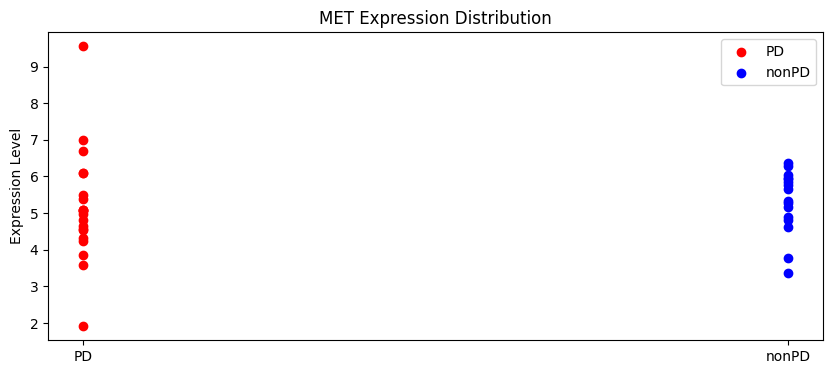

In [31]:
# Check MET expression specifically
met_data = results_df[results_df['gene'] == 'MET']

if not met_data.empty:
    print("\nMET Gene Expression:")
    print(f"Log2FC (PD vs nonPD): {met_data['log2FC'].values[0]:.3f}")
    print(f"p-value: {met_data['p_value'].values[0]:.4f}")
    print(f"Mean Expression - PD: {met_data['mean_PD'].values[0]:.3f}")
    print(f"Mean Expression - nonPD: {met_data['mean_nonPD'].values[0]:.3f}")
    
    # Plot MET expression across samples
    plt.figure(figsize=(10, 4))
    pd_vals = [gene_expr_filtered.at['MET', s] for s in pd_samples if pd.notna(gene_expr_filtered.at['MET', s])]
    nonpd_vals = [gene_expr_filtered.at['MET', s] for s in nonpd_samples if pd.notna(gene_expr_filtered.at['MET', s])]
    
    plt.scatter(['PD']*len(pd_vals), pd_vals, color='red', label='PD')
    plt.scatter(['nonPD']*len(nonpd_vals), nonpd_vals, color='blue', label='nonPD')
    plt.title("MET Expression Distribution")
    plt.ylabel("Expression Level")
    plt.legend()
    plt.show()
else:
    print("MET gene not found in results")